Implement convolution of two signals


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import siggen as sg
import siganalysis as sa



In [5]:
## I need to check this: probably better to send in s_result
## instead of returning the product to avoid creating a temp
## array
def multiply_accumulate(s_result, s1, s2):
    s_result += s1 * s2
    

    

roll s1:
len s1 =  10
len s1 =  10
roll s2:
np.conv: s1 10 s2 10 result 19


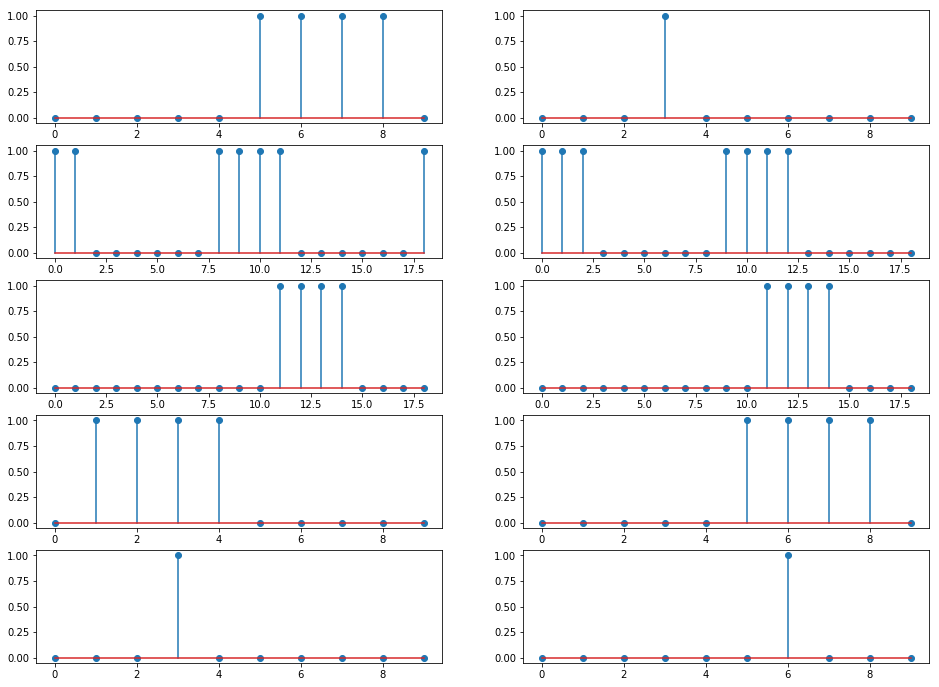

In [19]:
s1 = sg.gen_sig_unit_pulse(10, 5, 8)
s2 = sg.gen_sig_delta(10, 3)

fig, ax = plt.subplots(5, 2, figsize = (16, 12))

ax[0,0].stem(s1)
ax[0,1].stem(s2)

## check the number of iterations
len_res = len(s1) + len(s2) - 1


s_result = np.zeros(len_res)
print("roll s1:")
print("len s1 = ", len(s1))
ax[3,1].stem(s1)
s1 = np.flip(s1)
print("len s1 = ", len(s1))
ax[3,0].stem(s1)
for i in range(len_res):
    #multiply_accumulate(s_result, s1, s2)
    s_result[i] = s2.dot(s1)
    #print(s1)
    #print(s_result)
    s1 = np.roll(s1, -1)
ax[1,0].stem(s_result)
print("roll s2:")
ax[4,0].stem(s2)
s2 = np.flip(s2)
ax[4,1].stem(s2)
s1 = np.flip(s1)

s_result = np.zeros(len_res)
for i in range(len_res):
    # multiply_accumulate(s_result, s1, s2)
    s_result[i] = s1.dot(s2)
    #print(s2)
    #print(s_result)
    s2 = np.roll(s2, -1)
ax[1,1].stem(s_result)
s_result = np.convolve(s1, s2)
ax[2,0].stem(s_result)
s_result = np.convolve(s2, s1)
ax[2,1].stem(s_result)
print("np.conv: s1 {} s2 {} result {}".format(len(s1), len(s2), len(s_result)))
plt.show()

0: 1.9999999999999998
1: -2.0000000000000004
2: -2.0
3: 2.0
4: 1.9999999999999982
5: -2.000000000000001
6: -1.9999999999999996
7: 2.0000000000000004


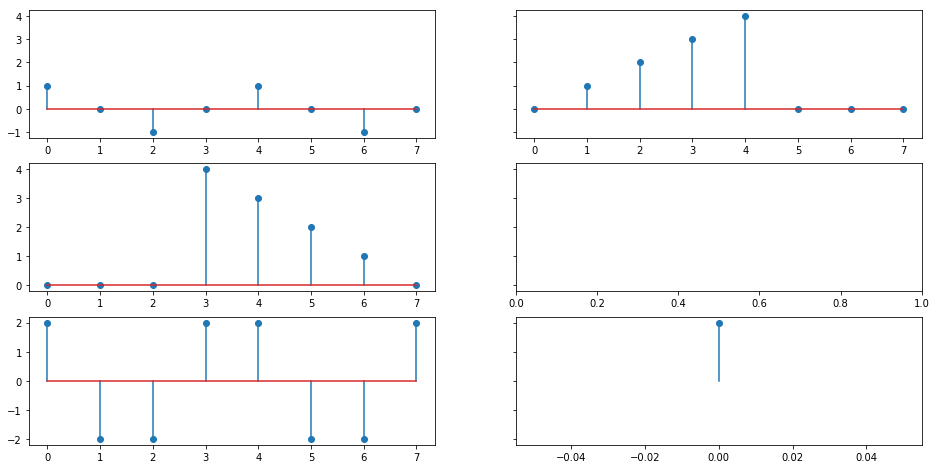

In [7]:
# s1 = np.array([1, 0, -1, 0, 1, 0, -1, 0])
s1 = sg.gen_sig_cos(8, 2, 8)
s2 = np.array([0, 1, 2, 3, 4, 0, 0, 0])

fig, ax = plt.subplots(3, 2, figsize = (16, 8), sharey='row')

ax[0,0].stem(s1)
ax[0,1].stem(s2)

s2_inv = np.flip(s2)
ax[1,0].stem(s2_inv)

s_result = np.zeros(len(s2_inv))
for i in range(len(s_result)):
    s_result[i] = s1.dot(s2_inv)
    print("{}: {}".format(i, s_result[i]))
    s2_inv = np.roll(s2_inv, -1)
    
ax[2,0].stem(s_result)
s_r_c = np.convolve(s1, s2, 'valid')
ax[2,1].stem(s_r_c)
plt.show()

0: 3.0
1: 2.0
2: 1.0
3: 0.0
4: 0.0
5: 0.0
6: 0.0
7: 1.0
8: 2.0
9: 3.0
10: 2.0
11: 1.0
12: 0.0
13: 0.0
14: 0.0
15: 0.0
16: 1.0


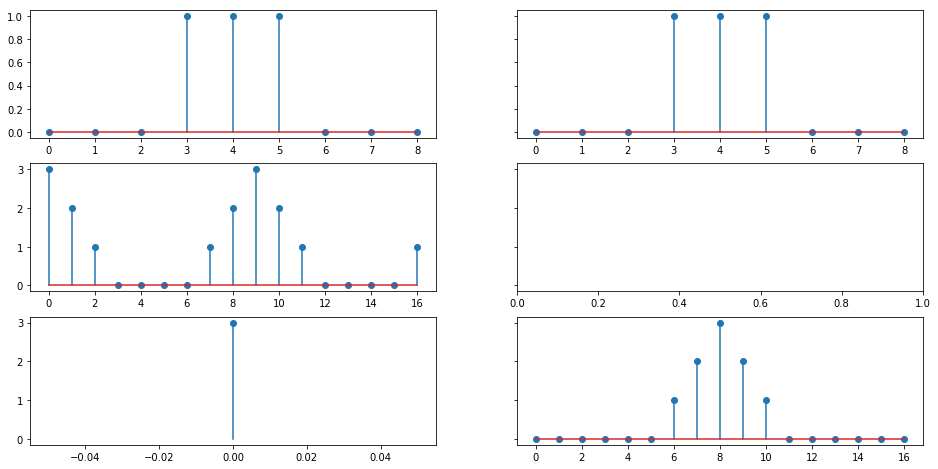

In [15]:
# s1 = np.array([1, 0, -1, 0, 1, 0, -1, 0])
s1 = sg.gen_sig_unit_pulse(9, 3, 5)
s1_r = np.flip(s1)
fig, ax = plt.subplots(3, 2, figsize = (16, 8), sharey='row')

ax[0,0].stem(s1)
ax[0,1].stem(s1_r)

len_result = len(s1) + len(s1_r) - 1
s_result = np.zeros(len_result)
for i in range(len_result):
    s_result[i] = s1.dot(s1_r)
    print("{}: {}".format(i, s_result[i]))
    s1_r = np.roll(s1_r, -1)
    
ax[1,0].stem(s_result)
s_r_c1 = np.convolve(s1, s1, 'valid')
s_r_c2 = np.convolve(s1, s1, 'same')
ax[2,0].stem(s_r_c1)
ax[2,1].stem(s_r_c2)
plt.show()

target length  8
target length  15


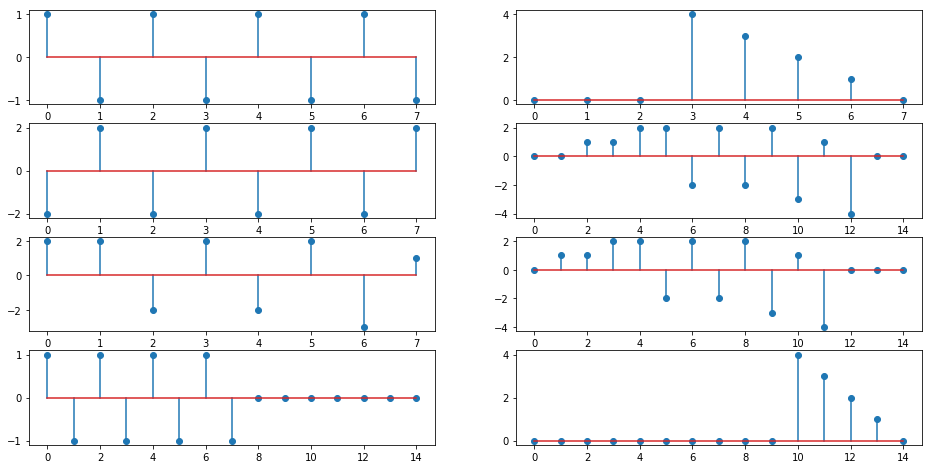

In [39]:
s1 = sg.gen_sig_cos(8, 4, 8)
s2 = np.array([0, 1, 2, 3, 4, 0, 0, 0])
s2 = np.flip(s2)
fig, ax = plt.subplots(4, 2, figsize = (16, 8))

ax[0,0].stem(s1)
ax[0,1].stem(s2)

target_len1 = len(s1) 
s_result1 = np.zeros(target_len1)
print("target length ", target_len1)
for i in range(target_len1):
    s_result1[i] = s1.dot(s2)
    #print(s1)
    #print(s2)
    #print("{}: {}".format(i, s_result[i]))
    s2 = np.roll(s2, 1)
target_len2 = len(s1) + len(s2) - 1
s_result2 = np.zeros(target_len2)
s2 = np.array([0, 1, 2, 3, 4, 0, 0, 0])
s1 = np.pad(s1, (0, target_len2 - len(s1)), 'constant')
s2 = np.pad(s2, (0, target_len2 - len(s2)), 'constant')
s2 = np.flip(s2)
ax[3,0].stem(s1)
ax[3,1].stem(s2)
print("target length ", target_len2)
for i in range(target_len2):
    s_result2[i] = s1.dot(s2)
    #print("{}: {}".format(i, s_result2[i]))
    s2 = np.roll(s2, 1)
    
ax[1,0].stem(s_result1)
ax[1,1].stem(s_result2)
s1 = sg.gen_sig_cos(8, 4, 8)
s2 = np.array([0, 1, 2, 3, 4, 0, 0, 0])
s_r_c1 = np.convolve(s1, s2, 'same')
s_r_c2 = np.convolve(s1, s2)
ax[2,0].stem(s_r_c1)
ax[2,1].stem(s_r_c2)
plt.show()